<a href="https://colab.research.google.com/github/jtanumihardja/general/blob/main/Homework3_F22_LinearRegression_JessicaTanumihardja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IE 7300: Statistical learning for Engineering** 


**Homework 2**
 
Jessica Tanumihardja  
 
206-883-8622  
 
tanumihardja.j@northeastern.edu  
 
 
   

# Problem 1

1. Create a custom linear regression model using the house pricing dataset(houseprices.csv Download houseprices.csv ) (20 points)

 a) Split the dataset into training and test dataset 80:20

 b) Custom linear regression model should be in python class format (Should have init(), predict(), train() methods) and train the model using training dataset

 c) Predict the house prices using test dataset

 d) Show the predicted output, and loss function output plots

 e) Calculate the RMSE and R2 metrics

Note: Do not use any libraries


## Problem 1a: split df to train and test

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Preprocessing libraries to check
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

Insert files using google drive or import file below:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_house = pd.read_csv('/content/drive/MyDrive/School_Related/NEU/IE7300/houseprices.csv')
df_house

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


or:

In [3]:
from google.colab import files
uploaded = files.upload()

Saving houseprices.csv to houseprices.csv


In [4]:
# Input the data set and understanding data
df_house = pd.read_csv("houseprices.csv")
df_house

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


**Understanding data**

In [5]:
#check the shape of df and unique values
print(df_house.shape) 
print(df_house['Home'].nunique()) 
print(df_house['Price'].nunique()) 
  #All house identified by a unique number: no need to drop duplicate

(128, 8)
128
123


In [6]:
#Check for NA and data type: last two columns are object, need to convert categorical variable to numbers.
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


**Visualizing dataset**
<br>
to check relationship

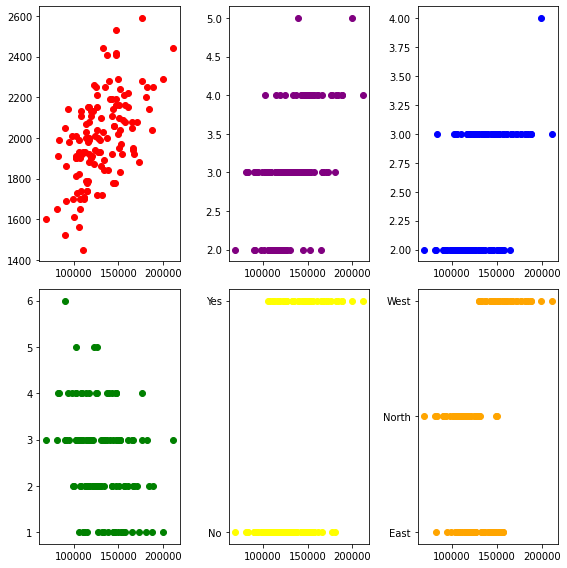

In [7]:
# since df has 6 column except the house price and house #, plot 6 graphs.
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))
fig.figsize = (10, 10)
ax[0, 0].scatter(df_house['Price'], df_house['SqFt'],color = 'red')
ax[0, 1].scatter(df_house['Price'], df_house['Bedrooms'],color = 'purple')
ax[0, 2].scatter(df_house['Price'], df_house['Bathrooms'],color = 'blue')
ax[1, 0].scatter(df_house['Price'], df_house['Offers'], color ='green')
ax[1, 1].scatter(df_house['Price'], df_house['Brick'],color = 'yellow')
ax[1, 2].scatter(df_house['Price'], df_house['Neighborhood'],color = 'orange')
plt.tight_layout()

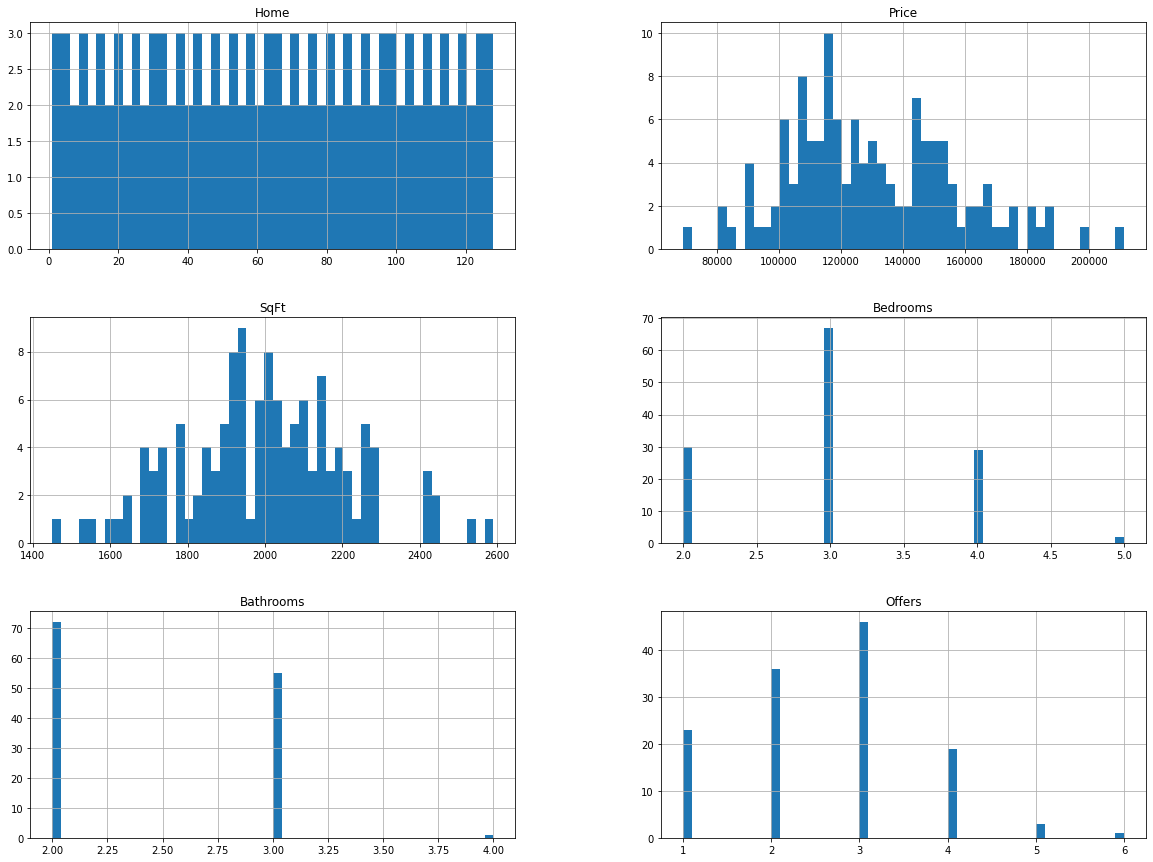

In [8]:
#plot the histogram to see if it is normally distributed
df_house.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()
#home index can be neglected since it is only index. 
#Besides Price and SqFt, the data are categorical. # of offers kind of following normal distribution. 

**Plot price vs. variables:**

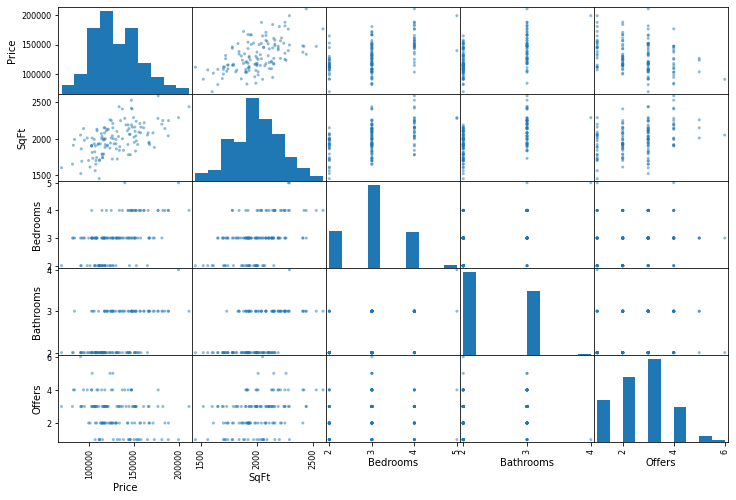

In [9]:
pd.plotting.scatter_matrix(df_house.iloc[:,1:], figsize=(12, 8))
plt.savefig('matrix.png')

**Convert categorical variable**

In [10]:
# convert categorical variable to numbers without additional library
# need to replace text values in Column "Brick" and "Neighborhood" to interger
df_house['Brick'].replace(['Yes', 'No'], [1, 0], inplace=True)
df_house['Neighborhood'].replace(['East', 'North', 'West'], [1, 2, 3], inplace=True) #no south according to data visualization above
df_house

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,0,1
1,2,114200,2030,4,2,3,0,1
2,3,114800,1740,3,2,1,0,1
3,4,94700,1980,3,2,3,0,1
4,5,119800,2130,3,3,3,0,1
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,1,1
124,125,147900,2160,4,3,3,1,1
125,126,113500,2070,2,2,2,0,2
126,127,149900,2020,3,3,1,0,3


In [11]:
#general statistics of the data
#all makes sense except the two categorical data under 'Brick' and 'Neighborhood'
df_house.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125,0.328125,1.953125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324,0.471376,0.811913
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000,0.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000,0.000000,1.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000,0.000000,2.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000,1.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000,1.000000,3.000000


**Standardize**
<br>
convert data to standard normalized form to equalize scaling

In [12]:
#since most data follows normal distribution: standardize dataframe to fit standard normal distribution
#Equation: z = (x-mu)/sigma where mu = mean, sigma = standard deviation
df_house_std = (df_house-df_house.mean())/df_house.std()
df_house_std

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,-1.711845,-0.600226,-0.996999,-1.409788,-0.865538,-0.540645,-0.696101,-1.173925
1,-1.684887,-0.603948,0.137364,1.345217,-0.865538,0.394525,-0.696101,-1.173925
2,-1.657929,-0.581617,-1.233325,-0.032285,-0.865538,-1.475815,-0.696101,-1.173925
3,-1.630971,-1.329698,-0.098961,-0.032285,-0.865538,0.394525,-0.696101,-1.173925
4,-1.604013,-0.395528,0.610016,-0.032285,1.078126,0.394525,-0.696101,-1.173925
...,...,...,...,...,...,...,...,...
123,1.604013,-0.399250,-0.477082,-0.032285,1.078126,0.394525,1.425350,-1.173925
124,1.630971,0.650296,0.751811,1.345217,1.078126,0.394525,1.425350,-1.173925
125,1.657929,-0.630001,0.326425,-1.409788,-0.865538,-0.540645,-0.696101,0.057734
126,1.684887,0.724732,0.090099,-0.032285,1.078126,-1.475815,-0.696101,1.289393


In [13]:
#check if mean = 0 and sigma = 1
df_house_std.describe()
#yes, so standardization successful

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
count,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02
mean,-6.938894e-18,-1.387779e-17,3.469447e-18,-5.204170e-17,1.006140e-16,-2.081668e-17,6.938894e-18,5.551115e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.711845e+00,-2.282477e+00,-2.604014e+00,-1.409788e+00,-8.655378e-01,-1.475815e+00,-6.961011e-01,-1.173925e+00
25%,-8.559226e-01,-7.109497e-01,-5.716128e-01,-3.228522e-02,-8.655378e-01,-5.406451e-01,-6.961011e-01,-1.173925e+00
50%,0.000000e+00,-1.666375e-01,-4.431107e-03,-3.228522e-02,-8.655378e-01,3.945248e-01,-6.961011e-01,5.773402e-02
75%,8.559226e-01,6.633224e-01,6.572808e-01,-3.228522e-02,1.078126e+00,3.945248e-01,1.425350e+00,1.289393e+00
max,1.711845e+00,3.006191e+00,2.784212e+00,2.722720e+00,3.021790e+00,3.200034e+00,1.425350e+00,1.289393e+00


**Split dataset to train and test df**

In [14]:
''' split data into two without using additional libraries:
      - train data: 80%
      - test data: 20%
'''
df_train = df_house_std.sample(frac=0.8, random_state=20)
df_test = df_house_std.drop(df_train.index)

print(f"No. of training examples: {df_train.shape[0]}")
print(f"No. of testing examples: {df_test.shape[0]}")

# No. of training examples: 102 (80%, round down)
# No. of testing examples: 26 (20%, round up)

No. of training examples: 102
No. of testing examples: 26


In [15]:
#check dataset again
df_train
# train dataframe has 102 rows 

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
76,0.336977,-0.023348,-0.335287,-0.032285,-0.865538,-0.540645,-0.696101,1.289393
0,-1.711845,-0.600226,-0.996999,-1.409788,-0.865538,-0.540645,-0.696101,-1.173925
66,0.067395,-0.157333,0.988137,-0.032285,1.078126,1.329695,-0.696101,0.057734
56,-0.202186,0.389771,0.893607,-0.032285,-0.865538,0.394525,1.425350,-1.173925
78,0.390894,-0.339701,0.610016,-0.032285,-0.865538,0.394525,-0.696101,0.057734
...,...,...,...,...,...,...,...,...
119,1.496180,-0.771429,-0.382552,-1.409788,-0.865538,1.329695,-0.696101,0.057734
13,-1.361389,-0.153611,0.704546,-0.032285,1.078126,2.264865,1.425350,0.057734
111,1.280514,-0.577896,-1.233325,-1.409788,-0.865538,-0.540645,-0.696101,0.057734
6,-1.550096,0.788002,-0.807938,-0.032285,1.078126,0.394525,1.425350,1.289393


## Problem 1b: Linear Model

In [16]:
# Define features and labels from train data: producing array
x_train = df_train.iloc[:,2:].values #SqFt column onwards
y_train = df_train.iloc[:,1].values #house price

In [17]:
#check array
print(f"x_train shape = {x_train.shape}")
print(f"y_train shape = {y_train.shape}")

x_train shape = (102, 6)
y_train shape = (102,)


**Create cost(loss) function and gradient descent**
<br>
class format (Should have init(), predict(), train() methods)

In [66]:
#create linear regression class: should include init(), predict(), train() 
import numpy as np
import matplotlib.pyplot as plt

class multivariate_regression():
  #Functions to do linear regression for multiple variables. 
  #Includes init, cost function, gradient descent, train, and predict functions.
  #Linear model form: y = w * x + b

  def __init__(self,x, y, learning_rate=0.0001, epochs=10000):
    ''' 
    Listing parameters to initiate normal distribution, where:
      x = independent variable(s), x-axis
      y = dependent variable, y-axis 
      w = weight or slope of linear equation y = w * x + b
      b = bias or intercept of linear equation y = w * x + b
      learning_rate = how sensitive the calculation (hyperparameter)
      epochs = number of iterations (hyperparameter)
    '''
    self.x = x
    self.y = y
    self.learning_rate = learning_rate
    self.epochs = epochs

    #initialized w and b
    self.w = np.zeros(x_train.shape[1])
    self.b = 0

  def cost_function(self):
    '''
    Calculate the cost/loss function 
    Parameters: x(array), y(1D array), w(1D array), and b(scalar, intercept)
    Return: cost (scalar)
    '''
    error = (self.x.dot(self.w) + self.b) - self.y #function = y_hat - y
      #dot product with weight or slope to get y_hat or y_model
    n = len(self.y)
    cost = np.sum(error ** 2) / (2.0*n) 
      #numerator: sum of squared error
      #Denominator: 2.0 to make it a float since we perform division
      #cost = mean squared error
    return cost

  def train(self):
    '''
    Use train dataset to get linear model of dependent variable relationship with independent variable(s).
    First, calculate the gradient descent points of the dataset. 
    Then find the minimum w and b gradient (from class example) as optimum solutions

    Parameters: x(array), y(1D array), w(1D array), and b(scalar, intercept)
      learning_rate(scalar), epochs (scalar)
    
    Return: 
      - optimum w value for independent variable(s) (1D array)
      - optimum b value for independent variable (scalar)
      - all cost values for each iterations (1D array)
    '''
    #initilize array to store cost value calculated in the for loop below
    # to check if it is going downward
    cost_list = [] #np.zeros(self.epochs) #OR [0] * self.epochs #epochs = number of iteration. 
    
    for epoch in range(self.epochs): 
        z = self.x.dot(self.w) + self.b #z = y-dash
        loss = z - self.y #error
        
        w_gradient = self.x.T.dot(loss) / len(self.y) #Derivative with respect to weight (slope)
                #dot product with x itself (transposed) to get x-bar, same result with sum(squared error)
        b_gradient = np.sum(loss) / len(self.y) #Derivative with respect to bias (intercept)
        
        self.w = self.w - (self.learning_rate*w_gradient) #w converging to optimum value
        self.b = self.b - (self.learning_rate*b_gradient) #b converging to optimum value
  
        cost = self.cost_function()
        cost_list.append(cost)
        
        #print cost at every cycle to check values
        if (epoch%(self.epochs/10)==0):
          print("Cost at epoch",epoch,"is:",cost)
      
    return self.w, self.b, cost_list


  def predict(self, x_test):
    '''
    Function to predict dependent variable (y-hat) based on w and b calculated above.        

    Returns: y_predict (numpy.ndarray) or the dependent variable predicted from x values of test data.
    '''
    y_predict = x_test.dot(self.w) + (self.b)
    return y_predict

**Calling the class:**

In [60]:
#calling the function to be the model:
model = multivariate_regression(x=x_train, y=y_train, learning_rate=0.0005, epochs=10000)

In [61]:
w, b, cf = model.train()
print(f"weight/slope array = {w}")
print(f"bias/intercept value = {b}")
print(f"cost_list array = {cf}")

Cost at epoch 0 is: 0.48810835897673877
Cost at epoch 1000 is: 0.17513639712171064
Cost at epoch 2000 is: 0.11151137347363993
Cost at epoch 3000 is: 0.09337232499636006
Cost at epoch 4000 is: 0.08639917491987963
Cost at epoch 5000 is: 0.0830114848689417
Cost at epoch 6000 is: 0.08107217236069605
Cost at epoch 7000 is: 0.07984689242751426
Cost at epoch 8000 is: 0.07903156967001068
Cost at epoch 9000 is: 0.07847529204903712
weight/slope array = [ 0.4155783   0.17882131  0.18734253 -0.40254287  0.33045694  0.30208313]
bias/intercept value = -0.006942101439387413
cost_list array = [0.48810835897673877, 0.48743876250755513, 0.4867704095316766, 0.48610329756993825, 0.485437424148328, 0.48477278679797514, 0.4841093830551393, 0.4834472104612005, 0.4827862665626462, 0.48212654891106316, 0.4814680550631241, 0.4808107825805784, 0.48015472903024076, 0.4794998919839803, 0.47884626901871014, 0.47819385771637624, 0.47754265566394705, 0.47689266045340295, 0.476243869681725, 0.4755962809508847, 0.47494

**Evaluation:**
<br>
Cost function is reducing in values --> correct model (plot shown in part 1d).
<br>
At first trial with learning_rate of 0.0001, cost values decreased too rapidly. Changed to learning_rate = 0.0005. Cost values is decreasing at the rate predicted --> good learning rate and number iterations(epochs) specified. 

## Problem 1c: Predicting values

**Use df_test defined above**

In [267]:
#defining test data: turn df_test to array
x_test = df_test.iloc[:,2:].values #SqFt onwards
y_test = df_test.iloc[:,1].values #houseprice

In [63]:
#call the predict function above.
y_pred = model.predict(x_test)
print(f"predicted y values array = {y_pred}")

predicted y values array = [ 0.76100107 -1.08638937  0.39103715  0.14176163 -1.3326661  -1.15702633
  0.07027725 -1.58013447 -0.79443985 -1.27787541  1.24298618  1.13744704
 -0.61441754  0.62573745  2.00296144  0.2895843   0.97263657  0.30821857
  1.42271438 -0.79823594 -0.12715449 -1.47340368  0.12536029 -0.7041104
  0.40529102  0.980258  ]


## Problem 1d: Output
Show the predicted output, and loss function output plots

**Plotting cost function plot**

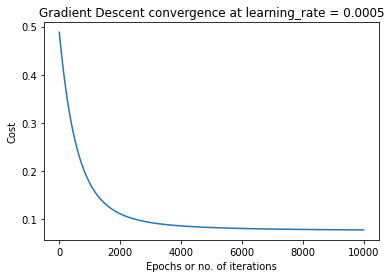

In [65]:
# Plotting the cost
plt.plot(cf)
plt.title("Gradient Descent convergence at learning_rate = 0.0005")
plt.xlabel("Epochs or no. of iterations")
plt.ylabel("Cost")
plt.show()

**Plotting predicted price and actual price for test data**

Text(0.5, 1.0, 'Test vs fitted values_standardized')

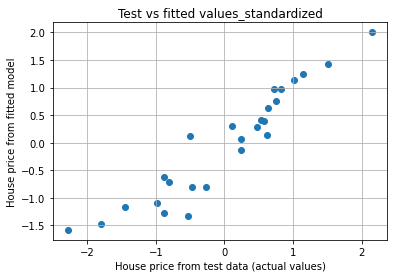

In [48]:
fig, ax = plt.subplots()

ax.scatter(y_test, y_pred)
ax.grid()
ax.set_xlabel('House price from test data (actual values)')
ax.set_ylabel('House price from fitted model')
ax.set_title('Test vs fitted values_standardized')

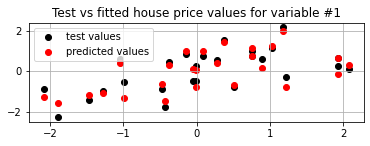

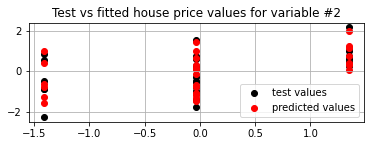

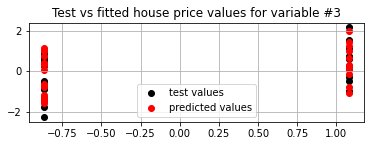

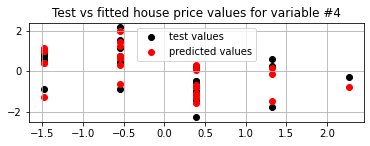

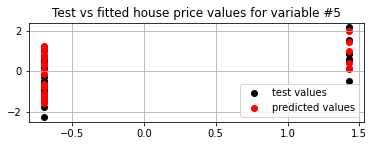

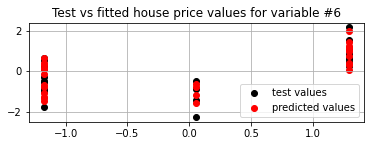

In [111]:
#cmap = plt.get_cmap("Accent")  # matplotlib.colors.ListedColormap
#colors = cmap.colors  # type: list
#ax.set_prop_cycle(color=colors)

#colors = ['g', 'b', 'y','k', 'y']

for i, col in enumerate(x_test[1]):
  plt.subplot(2, 1, 1)
  plt.scatter(x_test[:,i], y_test, c='black', label = "test values")
  plt.scatter(x_test[:,i], y_pred, c='red', label = "predicted values")
  plt.title(f"Test vs fitted house price values for variable #{i+1}")
  plt.legend()
  plt.grid()
  plt.show()

## Problem 1e: RMSE and $R^2$

Root mean squared error and R-squared

**Formula:**
<br>
RMSE = √Σ(Pi – Oi)2 / n

where:

    Σ is a symbol that means “sum”
    Pi is the predicted value for the ith observation
    Oi is the observed value for the ith observation
    n is the sample size

OR
<br>
RMSE=SQRT(MSE)=SQRT(1/n*RSS)
<br>
<br>
$R^2$ = 1 – (RSS/TSS)

where:

    RSS represents the sum of squares of residuals
    TSS represents the total sum of squares

Source: https://www.statology.org/rmse-vs-r-squared/

In [225]:
#root mean squared error
def rmse(y_pred, y):
    '''
    Root Mean squared error.
    
    Parameter:
    y_pred (array): dependent variable predicted values.
    y (array): test dependent variable values.
    
    Return:
    rmse (float): Root Mean Squared Error.
    '''
    rss = np.sum((y - y_pred)**2)
    rmse = (rss).mean()**(1/2)
    return rmse

In [226]:
#for test data
rmse(y_pred, y_test)

1.7304035668836681

**Calculating R2**
<br>
formula:

In [56]:
# Calculating the r² accuracy of our model
def r2score(y_pred, y):
  '''
    R square score.
    
    Parameter:
    y_pred (array): dependent variable predicted values.
    y (array): test dependent variable values.
    
    Return:
    r2 (float): R-Squared score.
  '''
  rss = np.sum((y_pred - y) ** 2)
  tss = np.sum((y-y.mean()) ** 2)
   
  r2 = 1 - (rss / tss)
  return r2

In [57]:
r2score(y_pred, y_test)

0.8901958352945725

**Analysis:**
<br>
The model is pretty good at predicting the house price since the r-squared value is closer to 1 (explain 89% of dependent variable variation), and the root mean squared error is relatively low (lesser distance between predicted value and actual value).

# Problem 2

2. Perform model selection using subset best, forward selection, and backward selection methods (15 points)

a) Show your best model features

c) Compare your model performance against the model Q1

## Problem 2a

OH: add error to increase your model performance
<br>
code source: class example

**Load the required packages and data preprocessing**

In [67]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm #following class example. Assume we can use it.
import matplotlib.pyplot as plt

Exercise: apply the best subset selection approach to the house pricing data. 
Goal: predict house price on the basis of various attributes related to the house.
<br>
reload the data again:

In [70]:
#categorical variable is changed to interger in Problem 1
df_house.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,0,1
1,2,114200,2030,4,2,3,0,1
2,3,114800,1740,3,2,1,0,1
3,4,94700,1980,3,2,3,0,1
4,5,119800,2130,3,3,3,0,1


In [73]:
#create a new df to do problem 2 so we keep the original intact
df_house2 = df_house
df_house2

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,0,1
1,2,114200,2030,4,2,3,0,1
2,3,114800,1740,3,2,1,0,1
3,4,94700,1980,3,2,3,0,1
4,5,119800,2130,3,3,3,0,1
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,1,1
124,125,147900,2160,4,3,3,1,1
125,126,113500,2070,2,2,2,0,2
126,127,149900,2020,3,3,1,0,3


In [74]:
print("Number of null values:", df_house2["Price"].isnull().sum())

Number of null values: 0


**No null values as tested in Problem 1. No need to do .dropna**


<br>
Split the df to train and test:

In [144]:
df_train2 = df_house2.sample(frac=0.8, random_state=20)
df_test2 = df_house2.drop(df_train2.index)
df_train2

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
76,77,129800,1930,3,2,2,0,3
0,1,114300,1790,2,2,2,0,1
66,67,126200,2210,3,3,4,0,2
56,57,140900,2190,3,2,3,1,1
78,79,121300,2130,3,2,3,0,2
...,...,...,...,...,...,...,...,...
119,120,109700,1920,2,2,4,0,2
13,14,126300,2150,3,3,5,1,2
111,112,114900,1740,2,2,2,0,2
6,7,151600,1830,3,3,3,1,3


**Now, work with the train dataset**

In [155]:
#keep all the independent variables except house index. 

#differentiate variables name from Problem 1, picked Y and X here.
Y = df_house2.Price #dependent variable

# Drop the column with the dependent variable (Price), house index, and columns for which we created dummy variables (none in this case)
#define the feature set X_
X = df_house2.drop(['Home', 'Price'], axis=1).astype('float64')
#no need to concat since we changed the categorical with numbers

In [156]:
#check result
Y

0      114300
1      114200
2      114800
3       94700
4      119800
        ...  
123    119700
124    147900
125    113500
126    149900
127    124600
Name: Price, Length: 128, dtype: int64

In [157]:
X

,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1790.0,2.0,2.0,2.0,0.0,1.0
1,2030.0,4.0,2.0,3.0,0.0,1.0
2,1740.0,3.0,2.0,1.0,0.0,1.0
3,1980.0,3.0,2.0,3.0,0.0,1.0
4,2130.0,3.0,3.0,3.0,0.0,1.0
...,...,...,...,...,...,...
123,1900.0,3.0,3.0,3.0,1.0,1.0
124,2160.0,4.0,3.0,3.0,1.0,1.0
125,2070.0,2.0,2.0,2.0,0.0,2.0
126,2020.0,3.0,3.0,1.0,0.0,3.0


### Best Subset Selection
<br>
We can perform best subset selection by identifying the best model that contains a given number of predictors, where **best** is quantified using RSS. We'll define a helper function to outputs the best set of variables for
each model size:

In [158]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(Y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - Y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [159]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

This returns a `DataFrame` containing the best model that we generated, along with some extra information about the model. Now we want to call that function for each number of predictors $k$:

In [160]:
# Could take quite awhile to complete depending on the size of the dataset...

models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,7): #range includes # of predictor, since we have 6 independent variable, use 7 (excluding last number)
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 6 models on 1 predictors in 0.014320611953735352 seconds.
Processed 15 models on 2 predictors in 0.03938412666320801 seconds.
Processed 20 models on 3 predictors in 0.0469357967376709 seconds.
Processed 15 models on 4 predictors in 0.03879117965698242 seconds.
Processed 6 models on 5 predictors in 0.020453453063964844 seconds.
Processed 1 models on 6 predictors in 0.006433963775634766 seconds.
Total elapsed time: 0.18680095672607422 seconds.


Now we have one big `DataFrame` that contains the best models we've generated along with their RSS:

In [161]:
models_best

,RSS,model
1,6.379185e+10,<statsmodels.regression.linear_model.Regressio...
2,3.846267e+10,<statsmodels.regression.linear_model.Regressio...
3,2.907627e+10,<statsmodels.regression.linear_model.Regressio...
4,1.915185e+10,<statsmodels.regression.linear_model.Regressio...
5,1.617390e+10,<statsmodels.regression.linear_model.Regressio...
6,1.441067e+10,<statsmodels.regression.linear_model.Regressio...


If we want to access the details of each model, no problem! We can get a full rundown of a single model using the `summary()` function:

In [162]:
print(models_best.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              3654.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):                   2.74e-112
Time:                        02:32:40   Log-Likelihood:                         -1431.0
No. Observations:                 128   AIC:                                      2866.
Df Residuals:                     126   BIC:                                      2872.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This output indicates that the best two-variable model
contains only `SqFt` and `Offers`. Can use the functions we defined above to explore as many variables as are desired. If we want to show all 6 variables:

In [163]:
# Show the best 6-variable model
print(getBest(6)["model"].summary())

Processed 1 models on 6 predictors in 0.005779266357421875 seconds.
                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              3181.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):                   1.81e-131
Time:                        02:32:42   Log-Likelihood:                         -1368.1
No. Observations:                 128   AIC:                                      2748.
Df Residuals:                     122   BIC:                                      2765.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P

Rather than letting the results of our call to the `summary()` function print to the screen, we can access just the parts we need using the model's attributes. For example, if we want the $R^2$ value:

In [164]:
models_best.loc[2, "model"].rsquared

0.9830496009942336

In addition to the verbose output we get when we print the summary to the screen, fitting the `OLM` also produced many other useful statistics such as adjusted $R^2$, AIC, and BIC. We can examine these to try to select the best overall model. Let's start by looking at $R^2$ across all our models:

In [165]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared, axis=1)

1    0.971887
2    0.983050
3    0.987186
4    0.991560
5    0.992872
6    0.993649
dtype: float64

As expected, the $R^2$ statistic increases monotonically as more
variables are included.

Plotting RSS, adjusted $R^2$, AIC, and BIC for all of the models at once will
help us decide which model to select. Note the `type="l"` option tells `R` to
connect the plotted points with lines:

Text(0, 0.5, 'BIC')

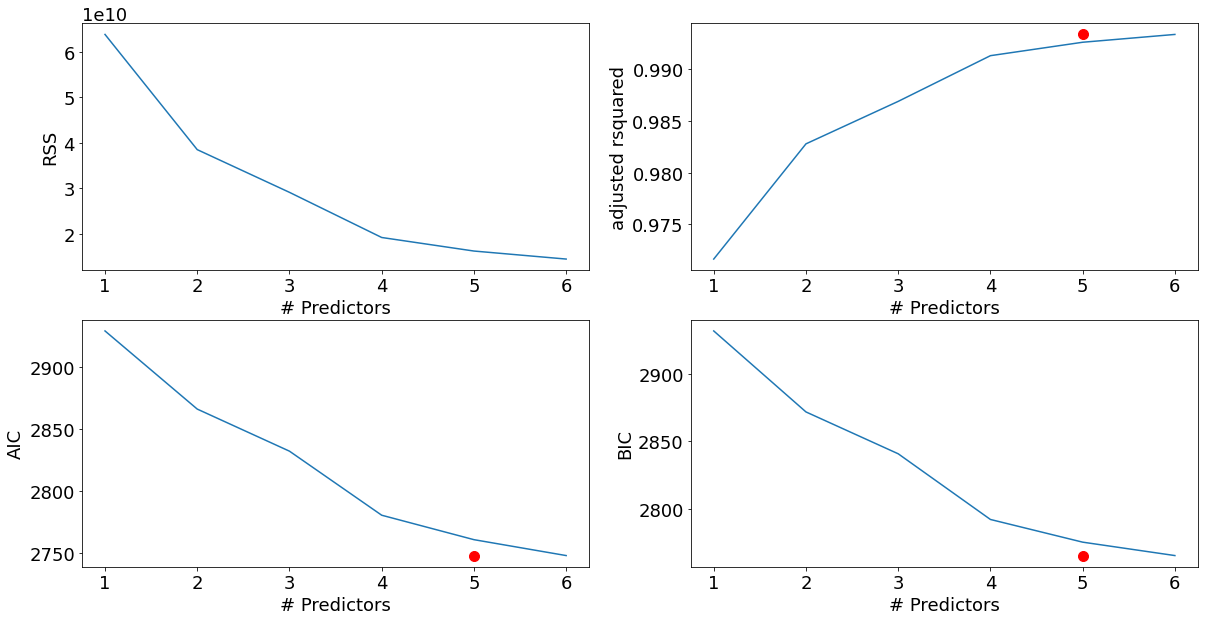

In [166]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or") #identify best point
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or") #identify best point
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or") #identify best point
plt.xlabel('# Predictors')
plt.ylabel('BIC')

Recall that in the second step of our selection process, we narrowed the field down to just one model on any $k<=p$ predictors. We see that according to adjusted $R^2$, AIC, BIC, the best performer is the model with **5 variables**. RSS shows model with 4 or 5 variables are best. 

### Forward Stepwise Selection
We can also use a similar approach to perform forward stepwise
or backward stepwise selection, using a slight modification of the functions we defined above:

In [113]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

Forward model will perform faster! (but quite similar in this case since the dataset is not large)

In [114]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  6 models on 1 predictors in 0.016825199127197266 seconds.
Processed  5 models on 2 predictors in 0.02119302749633789 seconds.
Processed  4 models on 3 predictors in 0.009845495223999023 seconds.
Processed  3 models on 4 predictors in 0.01297450065612793 seconds.
Processed  2 models on 5 predictors in 0.010796308517456055 seconds.
Processed  1 models on 6 predictors in 0.006556272506713867 seconds.
Total elapsed time: 0.10250687599182129 seconds.


In [115]:
#pull up the summary
print(models_fwd.loc[1, "model"].summary()) #based on 1 variables
print(models_fwd.loc[2, "model"].summary()) #based on 2 variables

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              4390.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):                   2.30e-100
Time:                        02:01:24   Log-Likelihood:                         -1463.3
No. Observations:                 128   AIC:                                      2929.
Df Residuals:                     127   BIC:                                      2932.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We see that using forward stepwise selection, the best one-variable
model contains only `SqFt`, and the best two-variable model additionally
includes `Offers`. Let's see how the models stack up against best subset selection (in 5 variables, as chosen best previously):

In [131]:
print(models_best.loc[5, "model"].summary())
print(models_fwd.loc[5, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              3427.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):                   3.35e-130
Time:                        02:20:45   Log-Likelihood:                         -1375.5
No. Observations:                 128   AIC:                                      2761.
Df Residuals:                     123   BIC:                                      2775.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

For this data, the best one-variable through five-variable
models are each identical for best subset and forward selection.


### Backward Selection
to implement backward selection: looping through the predictors in reverse!

In [117]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [124]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  6 models on 5 predictors in 0.021005868911743164 seconds.
Processed  5 models on 4 predictors in 0.015047073364257812 seconds.
Processed  4 models on 3 predictors in 0.015804767608642578 seconds.
Processed  3 models on 2 predictors in 0.013346195220947266 seconds.
Processed  2 models on 1 predictors in 0.006636857986450195 seconds.
Total elapsed time: 0.08637475967407227 seconds.


In [133]:
print(models_bwd.loc[6, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              3427.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):                   3.35e-130
Time:                        02:21:45   Log-Likelihood:                         -1375.5
No. Observations:                 128   AIC:                                      2761.
Df Residuals:                     123   BIC:                                      2775.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

For this data, the best one-variable through five-variable
models are identical for best subset and forward selection.
However, the best six-variable models identified by forward stepwise selection, backward stepwise selection, and best subset selection are  slightly different:

**Best model feature:**

In [141]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[5, "model"].params)

------------
Best Subset:
------------
SqFt               54.067467
Bedrooms         7974.359755
Offers         -10215.818767
Brick           19868.511386
Neighborhood     9334.050817
dtype: float64


In [142]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[5, "model"].params)

-----------------
Foward Selection:
-----------------
SqFt               54.067467
Offers         -10215.818767
Brick           19868.511386
Neighborhood     9334.050817
Bedrooms         7974.359755
dtype: float64


In [143]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[6, "model"].params)

-------------------
Backward Selection:
-------------------
SqFt               54.067467
Bedrooms         7974.359755
Offers         -10215.818767
Brick           19868.511386
Neighborhood     9334.050817
dtype: float64


### Calculating RMSE

In [189]:
models_best

,RSS,model
1,6.379185e+10,<statsmodels.regression.linear_model.Regressio...
2,3.846267e+10,<statsmodels.regression.linear_model.Regressio...
3,2.907627e+10,<statsmodels.regression.linear_model.Regressio...
4,1.915185e+10,<statsmodels.regression.linear_model.Regressio...
5,1.617390e+10,<statsmodels.regression.linear_model.Regressio...
6,1.441067e+10,<statsmodels.regression.linear_model.Regressio...


FORMULA:
RMSE=SQRT(MSE)=SQRT(1/n*RSS)

<br>
So get the RSS of the 5 variable model (optimum) from each selection type:

In [184]:
RSS_best = models_best.iloc[4, 0]
RSS_best

16173900886.137821

In [185]:
RSS_fwd = models_fwd.iloc[4, 0]
RSS_fwd

16173900886.13782

In [188]:
RSS_bwd = models_bwd.iloc[4, 0]
RSS_bwd

19151853845.849518

In [192]:
#cannot use mean because rss is calculated already
RMSE_best = (RSS_best/len(Y)) ** 0.5
RMSE_fwd = (RSS_fwd/len(Y)) ** 0.5
RMSE_bwd = (RSS_bwd/len(Y)) ** 0.5

In [193]:
print(f"The Root Mean Squared Error (RMSE) for best selection is = {RMSE_best}")
print(f"The Root Mean Squared Error (RMSE) for forward selection is = {RMSE_fwd}")
print(f"The Root Mean Squared Error (RMSE) for backward selection is = {RMSE_bwd}")

The Root Mean Squared Error (RMSE) for best selection is = 11240.934154817905
The Root Mean Squared Error (RMSE) for forward selection is = 11240.934154817904
The Root Mean Squared Error (RMSE) for backward selection is = 12232.08314927181


In [229]:
(RMSE_best - np.mean(Y))/np.std(Y)

-4.453301200595476

## Problem 2b

**Analysis:**
<br>
For backward model, only can display 5 variables because the inheritted -1 in the function. All three model parameters are almost similar. Highest weight is given to whether or not the house has brick. 

<br>
Compared to problem #1, the $R^2$ using this model selection is higher, so using this way to get a model is better to reduce variability. 
<br> 
However, the RMSE for problem 1 is calculated based on standardized data while Problem 2 is using original data. So the value is not comparable unless we revert the Problem 1 RMSE (~1.7) back to the original scale. From the calculation below, RMSE at the regular scale is 176,739, which is higher than the ones produce in problem 2 using any selections. Hence, using subset selection produces better model than problem 1. That is why we need to take into account ridge/lasso regression to increase the accuracy of linear regression.

In [233]:
#calculate orginal scale RMSE from problem 1
(1.7304035668836681*np.std(Y)) + np.mean(Y)

176739.18725611258

# Extra Credit

**Extra Credit Question: 5 Points**

a) Implement Ridge/Lasso regression for the dataset

b) Compare the lasso/ridge regression model output with Q1, and Q3 models performance metrics

Note: RMSE and R2 performance metrics are sufficient for comparison

 

Note: Provide the report in .pdf with proper title page

## Implement Lasso regression
Refer to textbook ESL page 68 for Lasso regression equation
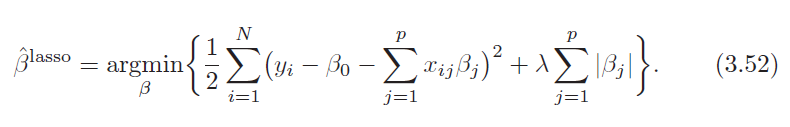

Lasso regression is usually implemented for future prediction. Lasso rigression adding L1 penalty (absolute value of the magnitude of weights) in the cost function. 


In [234]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Use the code provided by the class example and office hours:**

In [249]:
import numpy as np
import pandas as pd

class Regression:
    
    def __init__(self, regularization, lr, epoch):
        self.m = None #samples
        self.n = None #features
        self.w = None #weight
        self.b = None #bias
        self.regularization = regularization #penalty object
        self.lr = lr #learning rate
        self.epoch = epoch #iteration
        
    def __calculate_cost(self, y, y_pred):
        return (1 / (2*self.m)) * np.sum(np.square(y_pred-y)) + self.regularization(self.w)
    
    def __hypothesis(self, w, X):
        return np.dot(X, w) 
    
    def __initialization(self, X):
        X = np.insert(X, 0, 1, axis=1)
        self.m, self.n = X.shape
        self.w = np.zeros((self.n,1))
        return X
    
    def __update_parameters(self, X, y, y_pred):
        dw = (1/self.m) * np.dot(X.T, (y_pred - y)) + self.regularization.derivation(self.w)
        self.w = self.w - self.lr * dw
        return True
        
    def fit(self, X, y):
        X = self.__initialization(X)
        for e in range(1, self.epoch+1):
            y_pred = self.__hypothesis(self.w, X)
            cost = self.__calculate_cost(y, y_pred)
            self.__update_parameters(X, y, y_pred)
            if e % 100 == 0:
                print(f"The Cost in iteration {e}----->{cost} :)")
        return True

    def predict(self, X_test):
        X_test = np.insert(X_test, 0 , 1, axis= 1)
        y_pred = self.__hypothesis(self.w, X_test)
        return y_pred

    def calculate_rmse(self,y_real,y_pred):
        """returns root mean square error"""
        return np.sqrt(np.mean((y_pred-y_real)**2))
    
    def plot_cost(self):
        """plots the progress of cost on each iteration"""
        plt.title('Cost Function J')
        plt.xlabel('No. of iterations')
        plt.ylabel('Cost')
        plt.plot(self.cost_list)
        plt.show()
        
    def calculate_r2(self,X,y):
        """returns r2"""
        sum_squares = 0
        sum_residuals = 0
        y_mean = np.mean(y)
        for i in range(X.shape[0]):
            y_pred = self.__predictions(X[i])
            sum_squares += (y[i] - y_mean) ** 2
            sum_residuals += (y[i] - y_pred) ** 2
        score = 1- (sum_residuals / sum_squares)
        return score

#pick one (LASSO?)    
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self,w):
        return self.l * np.sum(np.abs(w))
        
    def derivation(self, w):
        return self.l * np.sign(w)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, w):
        return self.l * np.sum(np.square(w))
        
    def derivation(self, w):
        return self.l * 2 * w
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, w):
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(w))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(w))
        return (l1_contribution + l2_contribution)

    def derivation(self, w):
        l1_derivation = self.l * self.l_ratio * np.sign(w)
        l2_derivation = self.l * (1 - self.l_ratio) * w
        return (l1_derivation + l2_derivation)
    
class Lasso(Regression):
    
    def __init__(self, l, lr, epoch):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, epoch )
        
class Ridge(Regression):
    
    def __init__(self, l, lr, epoch):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, epoch )
        
class ElasticNet(Regression):
    
    def __init__(self, l, l_ratio, lr, epoch):
        self.regularization = ElasticPenalty(l,l_ratio)
        super().__init__(self.regularization, lr, epoch)

In [284]:
parameters = {
    "l" : 0.1, #assume lambda = 0.1
    "lr" : 0.005,
    "epoch" : 10000
}
model3 = Lasso(**parameters)
model3.fit(x_test, y_test) 
y_pred3 = model3.predict(x_test)
score = r2score(y = y_test, y_pred = y_pred3)
print("r2 score", score)

The Cost in iteration 100----->6.363476382644702 :)
The Cost in iteration 200----->3.7260581866732174 :)
The Cost in iteration 300----->2.738784270895417 :)
The Cost in iteration 400----->2.3553442233859787 :)
The Cost in iteration 500----->2.205104820866174 :)
The Cost in iteration 600----->2.1462884172087104 :)
The Cost in iteration 700----->2.1254819180652182 :)
The Cost in iteration 800----->2.1178757245183113 :)
The Cost in iteration 900----->2.115379206934585 :)
The Cost in iteration 1000----->2.1139380438270594 :)
The Cost in iteration 1100----->2.1137576314652566 :)
The Cost in iteration 1200----->2.1135304309093583 :)
The Cost in iteration 1300----->2.113468858792961 :)
The Cost in iteration 1400----->2.1134212826875687 :)
The Cost in iteration 1500----->2.1133526435064502 :)
The Cost in iteration 1600----->2.113717546568466 :)
The Cost in iteration 1700----->2.1135277654518356 :)
The Cost in iteration 1800----->2.113681707929155 :)
The Cost in iteration 1900----->2.1135906194

R2 value is smaller than Problem 1. There must be something wrong with the code or calling code because lasso regression should make the model fit better. 

In [285]:
rmse(y_pred3, y_test)

2.5995426717554673

RMSE is also higher, expected from higher R2, but it should be lower considering Lasso should improve the model
